In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
df = pd.read_csv('train.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [62]:
# now convert the categorical variables to numerical variables
# we will use the get_dummies function from pandas
df = pd.get_dummies(df, drop_first=True)
df.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
5,5417,4196.0,267.0,360.0,1.0,False,False,False,False,True,...,True,True,False,True,False,False,True,False,True,True
6,2333,1516.0,95.0,360.0,1.0,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,True
7,3036,2504.0,158.0,360.0,0.0,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
8,4006,1526.0,168.0,360.0,1.0,False,False,False,False,False,...,True,True,False,True,False,False,False,False,True,True
9,12841,10968.0,349.0,360.0,1.0,False,False,False,False,False,...,True,True,True,False,False,False,False,True,False,False


In [63]:
df.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
                           ..
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
Length: 628, dtype: int64

In [64]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [65]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Length: 628, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 628 entries, ApplicantIncome to Loan_Status_Y
dtypes: bool(623), float64(4), int64(1)
memory usage: 397.7 KB


In [67]:
x = df.drop(columns=['Loan_Status_Y'])
print(x.shape)

(614, 627)


In [68]:
y = df['Loan_Status_Y']
print(y.shape)

(614,)


In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Using Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred = model.predict(x_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7837837837837838
Confusion Matrix:
 [[ 27  38]
 [  2 118]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.42      0.57        65
        True       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [16]:
# print y_test and y_pred with pandas table
print(f"y_test:\n{y_test.head()}")
print(f"y_pred:\n{pd.Series(y_pred).head()}")

y_test:
350    True
377    True
163    True
609    True
132    True
Name: Loan_Status_Y, dtype: bool
y_pred:
0    True
1    True
2    True
3    True
4    True
dtype: bool


In [79]:
y_pred.shape

(185,)

In [76]:
np.sum(y_pred)

156

In [77]:
len(y_pred) - np.sum(y_pred)

29

In [78]:
156+29

185

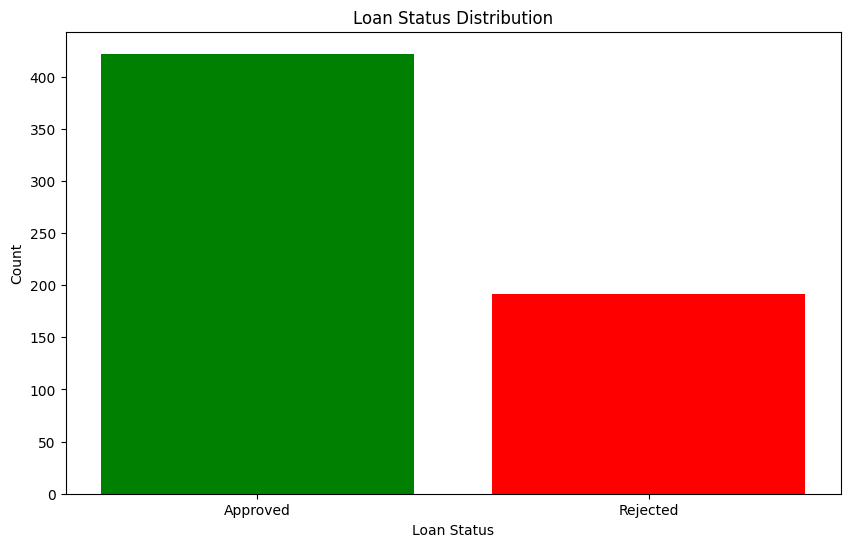

In [89]:
plt.figure(figsize=(10, 6))
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.bar(['Approved', 'Rejected'], [y.value_counts()[True], y.value_counts()[False]], color=['green', 'red'])
plt.show()

#### Using Linear Model

In [40]:
# use the standard scaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
x_train_scaled

array([[-0.50133384,  0.27865737,  0.40368493, ..., -0.39932375,
        -0.79056942,  1.40682858],
       [-0.42803179,  0.45103751,  0.09632945, ..., -0.39932375,
        -0.79056942, -0.71081865],
       [-0.5669725 ,  0.23208844, -0.15191921, ..., -0.39932375,
         1.26491106, -0.71081865],
       ...,
       [-0.37088951, -0.59751445, -1.38134113, ..., -0.39932375,
        -0.79056942,  1.40682858],
       [ 0.76362634, -0.59751445, -0.00519051, ..., -0.39932375,
         1.26491106, -0.71081865],
       [ 1.36387019, -0.59751445, -0.00519051, ..., -0.39932375,
        -0.79056942,  1.40682858]])

In [43]:
x_test_scaled

array([[ 0.60302821, -0.59751445,  0.95928907, ..., -0.39932375,
         1.26491106, -0.71081865],
       [-0.19213246, -0.59751445, -0.19920467, ..., -0.39932375,
         1.26491106, -0.71081865],
       [-0.21595563, -0.05408512,  0.13179354, ..., -0.39932375,
        -0.79056942, -0.71081865],
       ...,
       [ 1.04850477, -0.59751445,  0.47461312, ..., -0.39932375,
        -0.79056942,  1.40682858],
       [-0.39787799,  0.30982851, -0.09281238, ..., -0.39932375,
        -0.79056942, -0.71081865],
       [ 0.00611627, -0.59751445, -0.49473878, ...,  2.5042337 ,
        -0.79056942, -0.71081865]])

In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


LinearRegression()

In [52]:
y_proba = model.predict_proba(x_test)[:, 1]  # probabilities
y_proba


array([0.8766039 , 0.83575932, 0.83462706, 0.80839852, 0.86124728,
       0.70602074, 0.91669416, 0.82478271, 0.75976853, 0.71376467,
       0.3308903 , 0.79530302, 0.81291549, 0.7571012 , 0.84217071,
       0.77158009, 0.77533657, 0.83239289, 0.82294762, 0.94654905,
       0.81841771, 0.89718799, 0.77642857, 0.81507646, 0.69987003,
       0.69460449, 0.58698437, 0.85430259, 0.90013245, 0.92371359,
       0.86106919, 0.91249296, 0.83350102, 0.74973432, 0.75834128,
       0.09191511, 0.8041821 , 0.8554209 , 0.9165119 , 0.88627116,
       0.75578013, 0.60863919, 0.67429969, 0.80228531, 0.76358422,
       0.86939524, 0.58123867, 0.16439363, 0.14686948, 0.2602228 ,
       0.52795817, 0.87002437, 0.10734141, 0.71424766, 0.8031131 ,
       0.77504393, 0.7253664 , 0.6885592 , 0.09277973, 0.90747249,
       0.27261054, 0.72890751, 0.17815931, 0.7583    , 0.8543707 ,
       0.8045787 , 0.90682242, 0.78439906, 0.8596432 , 0.72518856,
       0.11791987, 0.82308664, 0.83055742, 0.82664732, 0.34750

In [53]:
y_pred = (y_proba >= 0.5).astype(int)        # convert to 0/1
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7837837837837838


#### Using KNN


In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=50, metric= 'minkowski', p = 10)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50, p=10)

In [22]:
KNN_Predict = KNN_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, KNN_Predict))


# for k in range(1, 50, 5):  # Try odd values up to 50
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train, y_train)
#     acc = accuracy_score(y_test, model.predict(x_test))
#     print(f"k = {k} → Accuracy = {acc:.4f}")

Accuracy: 0.6486486486486487


#### Using SVM Model

In [23]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC (max_iter=10000)
svm_model.fit(x_train, y_train)

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

In [24]:
SVM_model_predict = svm_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, SVM_model_predict))

Accuracy: 0.6486486486486487


#### Using decission Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
decission_tree_predict = decision_tree_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, decission_tree_predict))

Accuracy: 0.7837837837837838


#### Using Random Forest


In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
random_forest_predict = random_forest_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, random_forest_predict))

Accuracy: 0.7837837837837838


#### Using Naive Bayes


In [30]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)


GaussianNB()

In [31]:
naive_bayes_predict = naive_bayes_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, naive_bayes_predict))

Accuracy: 0.7783783783783784


#### Using Gradient Boosting

In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
xgb_predict = xgb_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, xgb_predict))

Accuracy: 0.745945945945946



1. Logistic Regression =  78.37 
2. Random Forest = 78.37
3. Naive Bayes =  77.87 
4. SVM = 64.86 
5. KNN = 64.86
6. XGBoost = 74.59
7. Decision Tree = 78.37 